In [12]:
!pip install nba_api
#cleaning the names of the nba players
from nba_api.stats.static import players
from nba_api.stats.static import teams 
from nba_api.stats.endpoints import boxscoreplayertrackv2
from nba_api.stats.endpoints import leaguegamelog
from nba_api.stats.endpoints import leaguegamefinder
import pandas as pd
from nba_api.stats.static import teams
from nba_api.stats.endpoints import leaguegamefinder
from datetime import datetime,timedelta
from nba_api.stats.endpoints import teamgamelogs
from nba_api.stats.endpoints import teamgamelog
from nba_api.stats.endpoints import leaguestandingsv3
import time
import os
import requests
import pandas as pd
import time
from timeit import default_timer as timer
from numpy import mean
import matplotlib.pyplot as plt

teams = teams.get_teams()
seasons_names = []
first_year = 2013
first_year_end = 14
for i in range(6):
    first_year = 2013
    first_year_end = 14
    first_year += i
    first_year_end += i
    first_year = str(first_year)
    first_year_end = str(first_year_end)
    season = first_year+'-'+first_year_end
    seasons_names.append(season)

standings_2013=leaguestandingsv3.LeagueStandingsV3(season_type='Regular Season',season='2013-14')
standings_2014=leaguestandingsv3.LeagueStandingsV3(season_type='Regular Season',season='2014-15')
standings_2015=leaguestandingsv3.LeagueStandingsV3(season_type='Regular Season',season='2015-16')
standings_2016=leaguestandingsv3.LeagueStandingsV3(season_type='Regular Season',season='2016-17')
standings_2017=leaguestandingsv3.LeagueStandingsV3(season_type='Regular Season',season='2017-18')
standings_2018=leaguestandingsv3.LeagueStandingsV3(season_type='Regular Season',season='2018-19')

standings_2013=standings_2013.standings.get_data_frame()
standings_2014=standings_2014.standings.get_data_frame()
standings_2015=standings_2015.standings.get_data_frame()
standings_2016=standings_2016.standings.get_data_frame()
standings_2017=standings_2017.standings.get_data_frame()
standings_2018=standings_2018.standings.get_data_frame()

league_standings = [standings_2013,standings_2014,standings_2015,standings_2016,standings_2017,standings_2018]
playoff_teams_by_year_official = {}
for i in range(len(seasons_names)):
    season = seasons_names[i]
    year = league_standings[i]
    playoff_teams = []
    for i in range(30):
        row = year.iloc[i,:]
        team = row['TeamName']
        clinch = row['ClinchIndicator']
        non_playoff_1 = ' - pi'
        non_playoff_2 = ' - o'
        if ((clinch != non_playoff_1) and (clinch != non_playoff_2)):
            playoff_teams.append(team)
        else:
            continue
    playoff_teams_by_year_official[season]=playoff_teams

def get_division_opponent_IDs(team_id):
    Atlantic = [1610612755,1610612751,1610612752,1610612761,1610612738]
    Central = [1610612749,1610612754,1610612741,1610612739,1610612765]
    Southeast = [1610612737,1610612748,1610612753,1610612766,1610612764]
    Northwest = [1610612757,1610612743,1610612762,1610612750,1610612760]
    Pacific = [1610612756,1610612747,1610612746,1610612758,1610612744]
    Southwest = [1610612759, 1610612745,1610612742,1610612740,1610612763]
    divisions = [Atlantic,Central,Southeast,Northwest,Pacific,Southwest]
    for division in divisions:
        if team_id in division:
            division.remove(team_id)
            return division
        else:
            continue
def get_conference_opponents_IDs(team_id):
    East = [1610612755,1610612751,1610612752,1610612761,1610612738,1610612749,1610612754,1610612741,1610612739,1610612765,1610612737,1610612748,1610612753,1610612766,1610612764]
    West = [1610612757,1610612743,1610612762,1610612750,1610612760,1610612756,1610612747,1610612746,1610612758,1610612744,1610612759, 1610612745,1610612742,1610612740,1610612763]
    conferences = [East,West]
    for conference in conferences:
        if team_id in conference:
            conference.remove(team_id)
            return conference
        else:
            continue
def get_conference_opponent_IDs_minus_division(team_id):
    Atlantic = [1610612755,1610612751,1610612752,1610612761,1610612738]
    Central = [1610612749,1610612754,1610612741,1610612739,1610612765]
    Southeast = [1610612737,1610612748,1610612753,1610612766,1610612764]
    Northwest = [1610612757,1610612743,1610612762,1610612750,1610612760]
    Pacific = [1610612756,1610612747,1610612746,1610612758,1610612744]
    Southwest = [1610612759, 1610612745,1610612742,1610612740,1610612763]
    East = [Atlantic,Central,Southeast]
    West = [Northwest,Pacific,Southwest]
    conferences = [East,West]
    for conference in conferences:
        for division in conference:
            if team_id in division:
                conference.remove(division)
                conference = conference[0]+conference[1]
                return conference
            else:
                continue
def get_opposing_conference_IDs(team_id):
    East = [1610612755,1610612751,1610612752,1610612761,1610612738,1610612749,1610612754,1610612741,1610612739,1610612765,1610612737,1610612748,1610612753,1610612766,1610612764]
    West = [1610612757,1610612743,1610612762,1610612750,1610612760,1610612756,1610612747,1610612746,1610612758,1610612744,1610612759, 1610612745,1610612742,1610612740,1610612763]
    if team_id in East:
        return West
    else:
        return East
Atlantic = [1610612755,1610612751,1610612752,1610612761,1610612738]
Central = [1610612749,1610612754,1610612741,1610612739,1610612765]
Southeast = [1610612737,1610612748,1610612753,1610612766,1610612764]
Northwest = [1610612757,1610612743,1610612762,1610612750,1610612760]
Pacific = [1610612756,1610612747,1610612746,1610612758,1610612744]
Southwest = [1610612759, 1610612745,1610612742,1610612740,1610612763]
Atlantic_abbreviations = []
Central_abbreviations = []
Southeast_abbreviations = []
Northwest_abbreviations = []
Pacific_abbreviations = []
Southwest_abbreviations = []
teams_dict = {}
for team in teams:
    abv = team['abbreviation']
    if team['id'] in Atlantic:
        Atlantic_abbreviations.append(abv)
        teams_dict[abv]=team['id']
    elif team['id'] in Central:
        Central_abbreviations.append(abv)
        teams_dict[abv]=team['id']
    elif team['id'] in Southeast:
        Southeast_abbreviations.append(abv)
        teams_dict[abv]=team['id']
    elif team['id'] in Northwest:
        Northwest_abbreviations.append(abv)
        teams_dict[abv]=team['id']
    elif team['id'] in Pacific:
        Pacific_abbreviations.append(abv)
        teams_dict[abv]=team['id']
    elif team['id'] in Southwest:
        Southwest_abbreviations.append(abv)
        teams_dict[abv]=team['id']
def get_division_opponent_ABVs(team_abv):
    Atlantic_abbreviations_copy = Atlantic_abbreviations.copy()
    Central_abbreviations_copy = Central_abbreviations.copy()
    Southeast_abbreviations_copy = Southeast_abbreviations.copy()
    Northwest_abbreviations_copy = Northwest_abbreviations.copy()
    Pacific_abbreviations_copy = Pacific_abbreviations.copy()
    Southwest_abbreviations_copy = Southwest_abbreviations.copy()
    divisions = [Atlantic_abbreviations_copy,Central_abbreviations_copy,Southeast_abbreviations_copy,Northwest_abbreviations_copy,Pacific_abbreviations_copy,Southwest_abbreviations_copy]
    for division in divisions:
        if team_abv in division:
            division.remove(team_abv)
            return division
        else:
            continue
def get_conference_opponents_ABVs(team_abv):
    East = Atlantic_abbreviations + Central_abbreviations + Southeast_abbreviations
    West = Northwest_abbreviations + Pacific_abbreviations + Southwest_abbreviations
    conferences = [East,West]
    for conference in conferences:
        if team_abv in conference:
            conference.remove(team_abv)
            return conference
        else:
            continue
def get_conference_opponent_ABVs_minus_division(team_abv):
    Atlantic_abbreviations_copy = Atlantic_abbreviations.copy()
    Central_abbreviations_copy = Central_abbreviations.copy()
    Southeast_abbreviations_copy = Southeast_abbreviations.copy()
    Northwest_abbreviations_copy = Northwest_abbreviations.copy()
    Pacific_abbreviations_copy = Pacific_abbreviations.copy()
    Southwest_abbreviations_copy = Southwest_abbreviations.copy()
    East = [Atlantic_abbreviations_copy, Central_abbreviations_copy, Southeast_abbreviations_copy]
    West = [Northwest_abbreviations_copy,Pacific_abbreviations_copy,Southwest_abbreviations_copy]
    conferences = [East,West]
    for conference in conferences:
        for division in conference:
            if team_abv in division:
                conference.remove(division)
                conference = conference[0]+conference[1]
                return conference
            else:
                continue
def get_opposing_conference_names(team_abv):
    East = Atlantic_abbreviations + Central_abbreviations + Southeast_abbreviations
    West = Northwest_abbreviations + Pacific_abbreviations + Southwest_abbreviations
    if team_abv in East:
        return West
    else:
        return East

league=Atlantic_abbreviations+Central_abbreviations+Southeast_abbreviations+Northwest_abbreviations+Pacific_abbreviations+Southwest_abbreviations
seasons_dict_72 = {}
seasons_dict_62 = {}
seasons_dict_58 = {}
numofgames = [58,62,72]
#alternatives - 58 games (2 games against each team in the league, eliminating the relevance of conferences signficantly)
#alternatives - 62 games - (2 games against each team in the league, 3 games against each team in your division)
#alternative - 72 games - (2 games against opposing conference teams, 3 games against same conference teams)
for season in seasons_names:
    time.sleep(60)
    temp_dict_58 = {}
    temp_dict_62 = {}
    temp_dict_72 = {}
    for i in range(len(league)):
        time.sleep(10)
        team = league[i]
        div_opponents = get_division_opponent_ABVs(team)
        team_id = teams_dict[team]
        conf_opponents = get_conference_opponent_ABVs_minus_division(team)
        opp_conf = get_opposing_conference_names(team)
        division_df_lst_58 = []
        non_division_same_conf_df_lst_58 = []
        non_conf_list_58 = []
        division_df_lst_62 = []
        non_division_same_conf_df_lst_62 = []
        non_conf_list_62 = []
        division_df_lst_72 = []
        non_division_same_conf_df_lst_72 = []
        non_conf_list_72 = []
        gmlogs = teamgamelogs.TeamGameLogs(season_nullable=season,league_id_nullable='00',team_id_nullable = team_id)
        gmlogs = gmlogs.team_game_logs.get_data_frame()
        gmlogs=gmlogs.sort_values(by="GAME_DATE")
        for num in numofgames:
            if num == 58:
                for z in div_opponents:
                    frmt1 = '{} @ {}'.format(team,z)
                    frmt2 = '{} vs. {}'.format(team,z)
                    mask1 = gmlogs['MATCHUP'] == frmt1
                    mask2 = gmlogs['MATCHUP'] ==  frmt2
                    division_df_lst_58.append(gmlogs[mask1].sort_values(by="GAME_DATE").head(1))
                    division_df_lst_58.append(gmlogs[mask2].sort_values(by="GAME_DATE").head(1))
                for x in conf_opponents:
                    frmt1 = '{} @ {}'.format(team,x)
                    frmt2 = '{} vs. {}'.format(team,x)
                    mask1 = gmlogs['MATCHUP'] == frmt1
                    mask2 = gmlogs['MATCHUP'] ==  frmt2
                    first_away_game = gmlogs[mask1].sort_values(by="GAME_DATE").head(1)
                    first_home_game = gmlogs[mask2].sort_values(by="GAME_DATE").head(1)
                    non_division_same_conf_df_lst_58.append(first_away_game)
                    non_division_same_conf_df_lst_58.append(first_home_game)
                for w in opp_conf:
                    frmt1 = '{} @ {}'.format(team,w)
                    frmt2 = '{} vs. {}'.format(team,w)
                    mask1 = gmlogs['MATCHUP'] == frmt1
                    mask2 = gmlogs['MATCHUP'] ==  frmt2
                    non_conf_list_58.append(gmlogs[mask1|mask2].sort_values(by="GAME_DATE"))      
            elif num == 62:
                for z in div_opponents:
                    frmt1 = '{} @ {}'.format(team,z)
                    frmt2 = '{} vs. {}'.format(team,z)
                    mask1 = gmlogs['MATCHUP'] == frmt1
                    mask2 = gmlogs['MATCHUP'] ==  frmt2
                    division_df_lst_62.append(gmlogs[mask1|mask2].sort_values(by="GAME_DATE").head(3))
                for x in conf_opponents:
                    frmt1 = '{} @ {}'.format(team,x)
                    frmt2 = '{} vs. {}'.format(team,x)
                    mask1 = gmlogs['MATCHUP'] == frmt1
                    mask2 = gmlogs['MATCHUP'] ==  frmt2
                    first_away_game = gmlogs[mask1].sort_values(by="GAME_DATE").head(1)
                    first_home_game = gmlogs[mask2].sort_values(by="GAME_DATE").head(1)
                    non_division_same_conf_df_lst_62.append(first_away_game)
                    non_division_same_conf_df_lst_62.append(first_home_game)
                for w in opp_conf:
                    frmt1 = '{} @ {}'.format(team,w)
                    frmt2 = '{} vs. {}'.format(team,w)
                    mask1 = gmlogs['MATCHUP'] == frmt1
                    mask2 = gmlogs['MATCHUP'] ==  frmt2
                    non_conf_list_62.append(gmlogs[mask1|mask2].sort_values(by="GAME_DATE"))
            elif num == 72:
                for z in div_opponents:
                    frmt1 = '{} @ {}'.format(team,z)
                    frmt2 = '{} vs. {}'.format(team,z)
                    mask1 = gmlogs['MATCHUP'] == frmt1
                    mask2 = gmlogs['MATCHUP'] ==  frmt2
                    division_df_lst_72.append(gmlogs[mask1|mask2].sort_values(by="GAME_DATE").head(3))
                for x in conf_opponents:
                    frmt1 = '{} @ {}'.format(team,x)
                    frmt2 = '{} vs. {}'.format(team,x)
                    mask1 = gmlogs['MATCHUP'] == frmt1
                    mask2 = gmlogs['MATCHUP'] ==  frmt2
                    non_division_same_conf_df_lst_72.append(gmlogs[mask1|mask2].sort_values(by="GAME_DATE").head(3))
                for w in opp_conf:
                    frmt1 = '{} @ {}'.format(team,w)
                    frmt2 = '{} vs. {}'.format(team,w)
                    mask1 = gmlogs['MATCHUP'] == frmt1
                    mask2 = gmlogs['MATCHUP'] ==  frmt2
                    non_conf_list_72.append(gmlogs[mask1|mask2].sort_values(by="GAME_DATE"))
                    
                division_df_58 = pd.concat(division_df_lst_58)
                division_df_62 = pd.concat(division_df_lst_62)
                division_df_72 = pd.concat(division_df_lst_72)
                non_division_same_conf_df_58 = pd.concat(non_division_same_conf_df_lst_58)
                non_division_same_conf_df_62 = pd.concat(non_division_same_conf_df_lst_62)
                non_division_same_conf_df_72 = pd.concat(non_division_same_conf_df_lst_72)
                non_conf_df_58 = pd.concat(non_conf_list_58)
                non_conf_df_62 = pd.concat(non_conf_list_62)
                non_conf_df_72 = pd.concat(non_conf_list_72)
                concat_this_58 = [division_df_58,non_division_same_conf_df_58,non_conf_df_58]
                concat_this_62 = [division_df_62,non_division_same_conf_df_62,non_conf_df_62]
                concat_this_72 = [division_df_72,non_division_same_conf_df_72,non_conf_df_72]
                last_df_58 = pd.concat(concat_this_58)
                last_df_62 = pd.concat(concat_this_62)
                last_df_72 = pd.concat(concat_this_72)
                num_of_Ws_58 = last_df_58['WL'].value_counts()['W']
                num_of_Ls_58 = last_df_58['WL'].value_counts()['L']
                num_of_Ws_62 = last_df_62['WL'].value_counts()['W']
                num_of_Ls_62 = last_df_62['WL'].value_counts()['L']
                num_of_Ws_72 = last_df_72['WL'].value_counts()['W']
                num_of_Ls_72 = last_df_72['WL'].value_counts()['L']                
                temp_dict_58[team]={'W':num_of_Ws_58,'L':num_of_Ls_58}
                temp_dict_62[team]={'W':num_of_Ws_62,'L':num_of_Ls_62}
                temp_dict_72[team]={'W':num_of_Ws_72,'L':num_of_Ls_72}
                seasons_dict_58[season]=temp_dict_58
                seasons_dict_62[season]=temp_dict_62
                seasons_dict_72[season]=temp_dict_72
    print('done season')

    
season_2013_58 = (pd.DataFrame.from_dict(seasons_dict_58['2013-14'], orient='index')).sort_values(by='W',ascending=False)
season_2014_58 = (pd.DataFrame.from_dict(seasons_dict_58['2014-15'], orient='index')).sort_values(by='W',ascending=False)
season_2015_58 = (pd.DataFrame.from_dict(seasons_dict_58['2015-16'], orient='index')).sort_values(by='W',ascending=False)
season_2016_58 = (pd.DataFrame.from_dict(seasons_dict_58['2016-17'], orient='index')).sort_values(by='W',ascending=False)
season_2017_58 = (pd.DataFrame.from_dict(seasons_dict_58['2017-18'], orient='index')).sort_values(by='W',ascending=False)
season_2018_58 = (pd.DataFrame.from_dict(seasons_dict_58['2018-19'], orient='index')).sort_values(by='W',ascending=False)

season_2013_62 = (pd.DataFrame.from_dict(seasons_dict_62['2013-14'], orient='index')).sort_values(by='W',ascending=False)
season_2014_62 = (pd.DataFrame.from_dict(seasons_dict_62['2014-15'], orient='index')).sort_values(by='W',ascending=False)
season_2015_62 = (pd.DataFrame.from_dict(seasons_dict_62['2015-16'], orient='index')).sort_values(by='W',ascending=False)
season_2016_62 = (pd.DataFrame.from_dict(seasons_dict_62['2016-17'], orient='index')).sort_values(by='W',ascending=False)
season_2017_62 = (pd.DataFrame.from_dict(seasons_dict_62['2017-18'], orient='index')).sort_values(by='W',ascending=False)
season_2018_62 = (pd.DataFrame.from_dict(seasons_dict_62['2018-19'], orient='index')).sort_values(by='W',ascending=False)

season_2013_72 = (pd.DataFrame.from_dict(seasons_dict_72['2013-14'], orient='index')).sort_values(by='W',ascending=False)
season_2014_72 = (pd.DataFrame.from_dict(seasons_dict_72['2014-15'], orient='index')).sort_values(by='W',ascending=False)
season_2015_72 = (pd.DataFrame.from_dict(seasons_dict_72['2015-16'], orient='index')).sort_values(by='W',ascending=False)
season_2016_72 = (pd.DataFrame.from_dict(seasons_dict_72['2016-17'], orient='index')).sort_values(by='W',ascending=False)
season_2017_72 = (pd.DataFrame.from_dict(seasons_dict_72['2017-18'], orient='index')).sort_values(by='W',ascending=False)
season_2018_72 = (pd.DataFrame.from_dict(seasons_dict_72['2018-19'], orient='index')).sort_values(by='W',ascending=False)


_58_games = [season_2013_58,season_2014_58,season_2015_58,season_2016_58,season_2017_58,season_2018_58]
_62_games = [season_2013_62,season_2014_62,season_2015_62,season_2016_62,season_2017_62,season_2018_62]
_72_games = [season_2013_72,season_2014_72,season_2015_72,season_2016_72,season_2017_72,season_2018_72]



East = Atlantic_abbreviations + Central_abbreviations + Southeast_abbreviations
West = Northwest_abbreviations + Pacific_abbreviations + Southwest_abbreviations
league_wide = [East,West]
team_nicknames = {}
for team in teams:
    abv = team['abbreviation']
    nickname = team['nickname']
    team_nicknames[abv]=nickname
def checkconference(row):
    team = row['Team']
    if team in East:
        return 'East'
    else:
        return 'West'
playoff_simmed_teams_by_season = {}
numofgames = [58,62,72]
for i in range(len(seasons_names)):
    season = seasons_names[i]
    playoff_simmed_teams_by_season[season]={}
    simmed_standings_58 = _58_games[i].copy()
    simmed_standings_62 = _62_games[i].copy()
    simmed_standings_72 = _72_games[i].copy()
    simmed_standings = [simmed_standings_58,simmed_standings_62,simmed_standings_72]
    for z in range(len(numofgames)):
        nofgames = numofgames[z]
        descrip = str(nofgames) + ' games'
        simmed_standings_itr = simmed_standings[z]
        simmed_standings_itr.index.name='Team'
        simmed_standings_itr=simmed_standings_itr.reset_index(drop=False)
        simmed_standings_itr['Conference']=simmed_standings_itr.apply(lambda ro:checkconference(ro),axis=1)
        east_standings = simmed_standings_itr[simmed_standings_itr['Conference']=='East']
        west_standings = simmed_standings_itr[simmed_standings_itr['Conference']=='West']
        if (nofgames==62) and (season=='2016-17'):
            east_standings = east_standings.reset_index(drop=False)
            indy_indx = east_standings.index[(east_standings['Team']=='IND')][0]
            indy_row = east_standings.iloc[indy_indx,:].copy()
            chi_indx = east_standings.index[(east_standings['Team']=='CHI')][0]
            chi_row = east_standings.iloc[chi_indx,:].copy()
            east_standings.iloc[chi_indx,:],east_standings.iloc[indy_indx,:] = indy_row,chi_row
        elif (nofgames==72) and (season=='2013-14'):
            west_standings = west_standings.reset_index(drop=False)
            PHX_indx = west_standings.index[(west_standings['Team']=='PHX')][0]
            PHX_row = west_standings.iloc[PHX_indx,:].copy()
            GSW_indx = west_standings.index[(west_standings['Team']=='GSW')][0]
            GSW_row = west_standings.iloc[GSW_indx,:].copy()
            west_standings.iloc[GSW_indx,:],west_standings.iloc[PHX_indx,:] = PHX_row,GSW_row
        elif (nofgames==58) and (season=='2014-15'):
            east_standings = east_standings.reset_index(drop=False)
            BKN_indx = east_standings.index[(east_standings['Team']=='BKN')][0]
            BKN_row = east_standings.iloc[BKN_indx,:].copy()
            MIL_indx = east_standings.index[(east_standings['Team']=='MIL')][0]
            MIL_row = east_standings.iloc[MIL_indx,:].copy()
            east_standings.iloc[MIL_indx,:],east_standings.iloc[BKN_indx,:] = BKN_row,MIL_row
            west_standings = west_standings.reset_index(drop=False)
            PHX_indx = west_standings.index[(west_standings['Team']=='PHX')][0]
            PHX_row = west_standings.iloc[PHX_indx,:].copy()
            NOP_indx = west_standings.index[(west_standings['Team']=='NOP')][0]
            NOP_row = west_standings.iloc[NOP_indx,:].copy()
            west_standings.iloc[NOP_indx,:],west_standings.iloc[PHX_indx,:] = PHX_row,NOP_row
        elif (nofgames==62) and (season=='2014-15'):
            east_standings = east_standings.reset_index(drop=False)
            indy_indx = east_standings.index[(east_standings['Team']=='IND')][0]
            indy_row = east_standings.iloc[indy_indx,:].copy()
            MIL_indx = east_standings.index[(east_standings['Team']=='MIL')][0]
            MIL_row = east_standings.iloc[MIL_indx,:].copy()
            east_standings.iloc[MIL_indx,:],east_standings.iloc[indy_indx,:] = indy_row,MIL_row
        elif (nofgames==72) and (season=='2014-15'):
            east_standings = east_standings.reset_index(drop=False)
            indy_indx = east_standings.index[(east_standings['Team']=='IND')][0]
            indy_row = east_standings.iloc[indy_indx,:].copy()
            BOS_indx = east_standings.index[(east_standings['Team']=='BOS')][0]
            BOS_row = east_standings.iloc[BOS_indx,:].copy()
            east_standings.iloc[BOS_indx,:],east_standings.iloc[indy_indx,:] = indy_row,BOS_row
            west_standings = west_standings.reset_index(drop=False)
            OKC_indx = west_standings.index[(west_standings['Team']=='OKC')][0]
            OKC_row = west_standings.iloc[OKC_indx,:].copy()
            NOP_indx = west_standings.index[(west_standings['Team']=='NOP')][0]
            NOP_row = west_standings.iloc[NOP_indx,:].copy()
            west_standings.iloc[NOP_indx,:],west_standings.iloc[OKC_indx,:] = OKC_row,NOP_row
        elif (nofgames==72) and (season=='2015-16'):
            west_standings = west_standings.reset_index(drop=False)
            HOU_indx = west_standings.index[(west_standings['Team']=='HOU')][0]
            HOU_row = west_standings.iloc[HOU_indx,:].copy()
            UTA_indx = west_standings.index[(west_standings['Team']=='UTA')][0]
            UTA_row = west_standings.iloc[UTA_indx,:].copy()
            west_standings.iloc[UTA_indx,:],west_standings.iloc[HOU_indx,:] = HOU_row,UTA_row
        elif (nofgames==72) and (season=='2016-17'):
            west_standings = west_standings.reset_index(drop=False)
            POR_indx = west_standings.index[(west_standings['Team']=='POR')][0]
            POR_row = west_standings.iloc[POR_indx,:].copy()
            DEN_indx = west_standings.index[(west_standings['Team']=='DEN')][0]
            DEN_row = west_standings.iloc[DEN_indx,:].copy()
            west_standings.iloc[DEN_indx,:],west_standings.iloc[POR_indx,:] = POR_row,DEN_row
        elif (nofgames==58) and (season=='2018-19'):
            east_standings = east_standings.reset_index(drop=False)
            MIA_indx = east_standings.index[(east_standings['Team']=='MIA')][0]
            MIA_row = east_standings.iloc[MIA_indx,:].copy()
            ORL_indx = east_standings.index[(east_standings['Team']=='ORL')][0]
            ORL_row = east_standings.iloc[ORL_indx,:].copy()
            east_standings.iloc[ORL_indx,:],east_standings.iloc[MIA_indx,:] = MIA_row,ORL_row
        east_playoff_teams = list(east_standings['Team'].head(8))
        west_playoff_teams = list(west_standings['Team'].head(8))
        playoff_teams_2 = east_playoff_teams+west_playoff_teams
        playoff_teams = []
        for t in playoff_teams_2:
            tm = team_nicknames[t]
            playoff_teams.append(tm)
        playoff_simmed_teams_by_season[season][descrip]=playoff_teams
        
        
accuracy_58_games = []
accuracy_62_games = []
accuracy_72_games = []

for i in range(len(seasons_names)):
    season = seasons_names[i]
    off_playoff_teams = playoff_teams_by_year_official[season]
    for z in range(len(numofgames)):
        nofgames = numofgames[z]
        descrip = str(nofgames) + ' games'
        predicted_teams = playoff_simmed_teams_by_season[season][descrip]
        count = 0
        for team in predicted_teams:
            if team in off_playoff_teams:
                count += 1
            else:
                continue
        accuracy = (count/16)
        if nofgames == 58:
            accuracy_58_games.append(accuracy)
        elif nofgames == 62:
            accuracy_62_games.append(accuracy)
        elif nofgames == 72:
            accuracy_72_games.append(accuracy)
print(accuracy_58_games)
print(accuracy_62_games)
print(accuracy_72_games)
print(mean(accuracy_58_games))
print(mean(accuracy_62_games))
print(mean(accuracy_72_games))


done season
done season
done season
done season
done season
done season
[0.875, 0.875, 1.0, 0.9375, 0.9375, 1.0]
[0.875, 0.8125, 1.0, 0.9375, 0.875, 0.9375]
[0.9375, 1.0, 1.0, 0.9375, 0.9375, 1.0]
0.9375
0.90625
0.96875


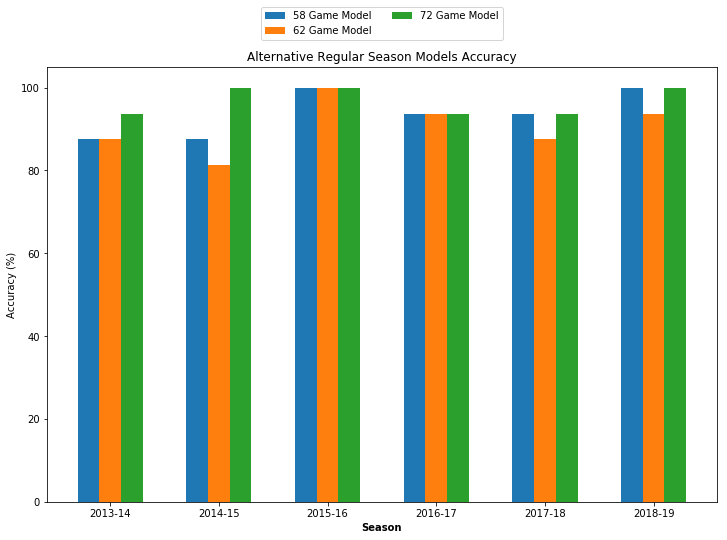

In [16]:
import numpy as np
labels = seasons_names
fifty_eight_game_model = [a*100 for a in accuracy_58_games] 
sixty_two_game_model = [a*100 for a in accuracy_62_games]
seventy_two_game_model = [a*100 for a in accuracy_72_games]

barwidth = .2
r1 = np.arange(len(labels))
r2 = [x + barwidth for x in r1]
r3 = [x + barwidth for x in r2]

plt.rcParams["figure.figsize"] = (12,8)
plt.bar(r1, fifty_eight_game_model, width=barwidth, label='58 Game Model')
plt.bar(r2, sixty_two_game_model, width=barwidth, label='62 Game Model')
plt.bar(r3, seventy_two_game_model, width=barwidth, label='72 Game Model')

plt.xlabel('Season', fontweight='bold')
plt.xticks([r + barwidth for r in range(len(labels))], labels)

plt.ylabel('''Accuracy (%)''')
plt.title('Alternative Regular Season Models Accuracy')

plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=2)
plt.show()
